## COMP41680 Assignment 2: Text Classification
Student Name- Vidushi Jain <br/>
Student Number- 18200009

In [2]:
import os
import urllib.request
import csv
import pandas as pd 
import sys,socket
import requests
import math
import json
import numpy as np
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('display.max_colwidth', -1)

## Task 1 

Select two review categories of your choice. Scrape all reviews for each category and store them as two separate datasets. For each review, you should store the review text and a class label (i.e. whether the review is “positive” or “negative”)

For this task, I have chosen <b>'Bars' and 'Hotels and travel'</b> category. From the main page, I am extracting the URL of these two categories. Then I am looping through each URL. For each URL, I am iterating over each business in that particular category. Then for each business, I am looping through reviews and fetching it's text and number of stars. At the end, I am storing the data in two dataframes separately for both categories.  

In [4]:
main_page_url='http://mlg.ucd.ie/modules/yalp/'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'}
response = requests.get(main_page_url,headers=headers)
content = response.content
soup = BeautifulSoup(content,"html.parser")  
headings = soup.find_all('a')
category_url_list=[]
for link in headings:
    if(link.text == 'Category: Bars' or link.text == 'Category: Hotels and travel'):
        category_url_list.append('http://mlg.ucd.ie/modules/yalp/%s'%(link['href']))
        
category_count=0;
bars_reviews_value=[]
hotels_travel_reviews_value=[]
    
for url in category_url_list:
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'}
    response = requests.get(url,headers=headers)
    content = response.content
    soup = BeautifulSoup(content,"html.parser")
    headings = soup.find_all('h6')
    for heading in headings:
        url=heading.find('a')['href']
        #business_name=heading.find('a').contents[0]
        request_url='http://mlg.ucd.ie/modules/yalp/%s'%(url)
        response = requests.get(request_url,headers=headers)
        content = response.content
        soup = BeautifulSoup(content,"html.parser")    
        reviews=soup.findAll('div', attrs={'class':'review'})
        for review in reviews:
            star_p=review.find('p', attrs={'class':'stars'})
            star_value=star_p.find('img')['alt']
            text=review.find('p', attrs={'class':'text'}).contents[0]
            if category_count == 0:
                bars_reviews_value.append([text,star_value])
            else:
                hotels_travel_reviews_value.append([text,star_value]) 
                
    category_count=category_count+1     

Creating dataframe from bars_reviews_value list which was created during the Web Scrapping and storing the data in a csv file for future use

In [5]:
bars_dataset = pd.DataFrame(bars_reviews_value)
bars_dataset.columns = ['Review Text','Star']
bars_dataset.head()

,Review Text,Star
0,"It would help if the front girl don't just sit us down and not ask us for drinks or put us with a waitress. Instead, let us just sit here for almost an hour unattended! If it's time for you to clock out then it's not our problem. But if you're gonna seat us be more professional about it at least then leave!",3-star
1,"One star because that's the least amount you can leave. I understand they have dollar margaritas but they should have enough people on staff to make all the food and get people seated and fed quickly. We came in restaurant seemed slow. Hostess said 10 minute wait to let the kitchen catch up. Well by the time we where seated the lobby was packed. As soon as we sat down we each ordered a water and a margarita we were a party of two. we place our order for food. That's where things went south. We sat for 45 minutes. The table that sat after us, ate and left before our appetizer ever came. I left a $5 on the table to cover margaritas. Never going back again.",1-star
2,"Bad time today. Dirty windows, table sticky, handy payment/menu gadget yucky. Used my fork to enter info. Food was burned and dry. Only dark chocolate desserts. Adios.",2-star
3,"My second visit in the last year. Both experiences were similar: awful. Tonight, we arrived after my daughter's dance recital, so around 10pm. Not too crowded, thought it would be a quick place to grab some appetizers. NOT! Our party of 6 ordered 4 appetizers (3 of which were sample size), 2 house salads, and a kids meal. 30 minutes later, one appetizer came out, said the remainder of the food would be out in about 3 minutes. 10 minutes later, a different server brought the salads out (40 minutes after were seated, just for salads!) but we had no silverware. Another 5 minutes later, 2 more appetizers and the kids meal came out and we asked for silverware. Next time the server rolled around, we again asked for silverware, and were told ""I told her to get you some,"" referring to the hostess. He called across the restaurant to the hostess, who said she didn't have any silverware. He grumbled and went to find some. Several minutes later, our last appetizer, and silverware finally arrived. So almost a full hour before we had our entire meal and utensils to eat it with. We asked about the 50% off appetizer sign on the table and the dude actually said ""you got here after 9, and that's for after 10 on the weekends."" He did finally honor the 50% off the regular appetizer when we basically had to tell him to look at the time on our ticket. . Not completely the server's fault, but the whole experience was horrible. After two very sub-par visits, my family will NEVER go back to this location.",1-star
4,"Absolutely awful! Took forever to get food, food then came out cold, we asked the manager to fix tv 3 times and it never got fix! The place was dead and it was still slower than molasses.",1-star


In [6]:
export_csv = bars_dataset.to_csv (r'bars_dataset.csv', index = None, header=True)

Creating dataframe from hotels_travel_reviews_value list which was created during the Web Scrapping and storing the data in a csv file for future use

In [7]:
hotels_travel_dataset = pd.DataFrame(hotels_travel_reviews_value)
hotels_travel_dataset.columns = ['Review Text','Star']
hotels_travel_dataset.head()

,Review Text,Star
0,"I have used this service before and was satisfied, until June 20, 2018. I prearranged via telephone a pickup from Terminal 3 to Georgetown and clearly specified a credit card would be used for payment to the driver. The car 570L arrived quickly and was clean and the drive uneventful. When it came time to pay I presented my MasterCard and that's when the problem started. The driver found he had no connection on his payment device. He tried several times to put the card throug, he even tried to put his own card through at one paint in this debacle, and each time the unit said 'no connection'. He then tried driving the car (with me in it) off my property and up and down the street in search of an internet connection, at one point he drove me to an auto repair facility up the road, stopping along the way and staying parked in the auto parking lot trying to obtain internet service. I finally asked after a very extended period to please return to my property to sort it out. It was getting dark and I was travelling alone and getting anxious. I only had a credit card in which to pay with. He proceeded to suggest that he would drive me into Georgetown to an ATM to get money. I said no to this as it would add another 20 minutes to this lengthy ordeal of being trapped in the car.i offered him a cheque which was the only other logical option. H e said no to that idea. He then proceeded to call his dispatch office and I could hear every word. They told him they could not take payments via this route as he was desperately trying to get someone to process my card payment. Then he called 'Gurdeep"", whoever that is, who told him to try charging his unit. He then spent at least 20 minutes looking over every inch of his car for his charger .....to no avail. I insisted after 45 minutes that I was leaving and going into my home and that a cheque would be the only option. He refused to leave my property. I went inside leaving him to pace around my driveway in the dark on the phone with Gurdeep. After another period of home the driver came to my door and asked me to speak to Gurdeep. I explained what was going on to Gurdeep and his impolite aggressive and rude response was that it was 'not his problem that I had no cash'.....and the problem was I lived in Halton Hills. I decided not to communicate any further with Gurdeep as he was not understanding of the situation, and of the fact that I had specified upon booking that I would be paying by credit card. The driver then told me he would call the police for non-payment, then decided after another call, and more pacing around my driveway that Gurdeep would accept my cheque. At this point I was terrified, and it was dark and I was alone. I told the driver I would have my husband (who was in another province) call the company to arrange a credit card payment. The driver still refused to leave. My husband called the company and they finally accepted his card for payment...somehow. The driver sat on the road in front of my house until the hit man Gurdeep received payment I guess. I will NEVER use this service again. It was a horrible experience. I had every intention of paying, and sincerely hope this does not happen to anyone else, especially a female travelling alone.",1-star
1,"First time I tried using them the driver was nowhere to be found. Called and found out he was still 30 minutes away! I understand there is traffic, but your job is to drive. Seriously, look/listen/read the traffic reports. Yes it may have been close to rush hour, so maybe leave a bit earlier? I've never had a problem getting to/from places outside the city on time, so I have a hard time understanding why someone who's job it is to do the same thing can't show up on time. Thought I'd give them another shot as maybe it was just a lazy/poor/uncaring driver. This time, 15 minutes before my pickup time, the driver cancels and I'm told they're finding me another vehicle. How long will that take? Don't know. Great

In [8]:
export_csv = hotels_travel_dataset.to_csv (r'hotels_travel_dataset.csv', index = None, header=True)

Loading the data from the CSV files which was created in the above step

In [9]:
bars_dataset=pd.read_csv("bars_dataset.csv")

In [10]:
hotels_travel_dataset=pd.read_csv("hotels_travel_dataset.csv")

Checking the Number of records in the Bars category

In [11]:
len(bars_dataset)

1460

Checking the Number of records in the Hotels and travel category

In [12]:
len(hotels_travel_dataset)

1430

<b>This shows that all the records were successfully scrapped from the URL provided. Number of records in the dataset matches the number of reviews mentioned of the webpage</b>
<img src="number_of_reviews.png" height=300, width=300></img>

Defining a function which returns whether the review is “positive” or “negative” based on the star rating. For this assignment, we are assuming that 1-star to 3-star reviews are “negative”, and 4-star to 5-star reviews as “positive”. 

In [13]:
def Positive_Negative_Based_On_Stars(star_text):
    number_of_stars=int(star_text[0])
    if 1 <= number_of_stars <= 3:
        return "Negative"
    elif 4 <= number_of_stars <= 5:
        return "Postive"
    

Creating a new column <b> 'class_label' </b>which classify review as "positive" or "negative" based on the star rating. In this for each value in the column 'Star', we are calling <b> Positive_Negative_Based_On_Stars function </b>, which return "positive" or "negative" value. We are then storing this value in the new column.

In [14]:
bars_dataset['class_label'] =\
bars_dataset['Star'].apply(lambda x: Positive_Negative_Based_On_Stars(x))

In [15]:
bars_dataset.head(1)

,Review Text,Star,class_label
0,"It would help if the front girl don't just sit us down and not ask us for drinks or put us with a waitress. Instead, let us just sit here for almost an hour unattended! If it's time for you to clock out then it's not our problem. But if you're gonna seat us be more professional about it at least then leave!",3-star,Negative


Doing the same for hotels and travel dataset

In [16]:
hotels_travel_dataset['class_label'] = \
hotels_travel_dataset['Star'].apply(lambda x: Positive_Negative_Based_On_Stars(x))

In [17]:
hotels_travel_dataset.head(1)

,Review Text,Star,class_label
0,"I have used this service before and was satisfied, until June 20, 2018. I prearranged via telephone a pickup from Terminal 3 to Georgetown and clearly specified a credit card would be used for payment to the driver. The car 570L arrived quickly and was clean and the drive uneventful. When it came time to pay I presented my MasterCard and that's when the problem started. The driver found he had no connection on his payment device. He tried several times to put the card throug, he even tried to put his own card through at one paint in this debacle, and each time the unit said 'no connection'. He then tried driving the car (with me in it) off my property and up and down the street in search of an internet connection, at one point he drove me to an auto repair facility up the road, stopping along the way and staying parked in the auto parking lot trying to obtain internet service. I finally asked after a very extended period to please return to my property to sort it out. It was getting dark and I was travelling alone and getting anxious. I only had a credit card in which to pay with. He proceeded to suggest that he would drive me into Georgetown to an ATM to get money. I said no to this as it would add another 20 minutes to this lengthy ordeal of being trapped in the car.i offered him a cheque which was the only other logical option. H e said no to that idea. He then proceeded to call his dispatch office and I could hear every word. They told him they could not take payments via this route as he was desperately trying to get someone to process my card payment. Then he called 'Gurdeep"", whoever that is, who told him to try charging his unit. He then spent at least 20 minutes looking over every inch of his car for his charger .....to no avail. I insisted after 45 minutes that I was leaving and going into my home and that a cheque would be the only option. He refused to leave my property. I went inside leaving him to pace around my driveway in the dark on the phone with Gurdeep. After another period of home the driver came to my door and asked me to speak to Gurdeep. I explained what was going on to Gurdeep and his impolite aggressive and rude response was that it was 'not his problem that I had no cash'.....and the problem was I lived in Halton Hills. I decided not to communicate any further with Gurdeep as he was not understanding of the situation, and of the fact that I had specified upon booking that I would be paying by credit card. The driver then told me he would call the police for non-payment, then decided after another call, and more pacing around my driveway that Gurdeep would accept my cheque. At this point I was terrified, and it was dark and I was alone. I told the driver I would have my husband (who was in another province) call the company to arrange a credit card payment. The driver still refused to leave. My husband called the company and they finally accepted his card for payment...somehow. The driver sat on the road in front of my house until the hit man Gurdeep received payment I guess. I will NEVER use this service again. It was a horrible experience. I had every intention of paying, and sincerely hope this does not happen to anyone else, especially a female travelling alone.",1-star,Negative


In [18]:
hotels_travel_dataset.groupby(['class_label']).count()

,Review Text,Star
class_label,,
Negative,637,637
Postive,793,793


In [19]:
bars_dataset.groupby(['class_label']).count()

,Review Text,Star
class_label,,
Negative,565,565
Postive,895,895


## Task 2

For both category datasets: <br>
a. From the reviews in this category, apply appropriate preprocessing steps to
create a numeric representation of the data, suitable for classification.<br>
b. Build a classification model using a classifier of your choice, to distinguish
between “positive” and “negative” reviews.<br>
c. Test the predictions of the classification model using an appropriate
evaluation strategy. Report and discuss the evaluation results in your
notebook

## Category 1 - Hotels and travel

For this task, we just need two columns 'Review Text' and 'class_label'. 

In [20]:
X=hotels_travel_dataset['Review Text'].values
Y=hotels_travel_dataset['class_label'].values

First we need to split the data in <b>training</b> and <b>test dataset</b>. Training dataset is used to train the model and create the document-term matrix. We are also using it to perform <b> parameter tuning </b> of the model. Once we have our model ready, we are predicting the values on the test dataset to find the accuracy and to create a confusion matrix. We are splitting the data into 70% training set and 30% test set. 

In [21]:
train_documents, test_documents, train_target, test_target = train_test_split(X, Y, random_state=0,\
                                                                              train_size = 0.7,test_size=0.3)

We are then transforming our list of Review text into a document-term matrix by applying some pre-processing steps. We are using <b>TF-IDF </b>for weighting the score for a term in a document. In this way we are improving the usefulness of the document-term matrix as this will give higher weights to more important terms by looking at the inverse document frequency(total number of distinct documents containing a term), along with term frequency.     

Pre-processing steps performed to create a numeric representation of the data are-

1) <b>Minimum term length</b>: Excluding terms of length < 2. Scikit-learn does this by default. <br>
2) <b>Case conversion</b>: Converting all terms to lowercase. Scikit-learn does this by default.<br>
3)<b> Stop-word filtering</b>: It involves removing terms which  appear frequently but doesn't convey useful information. We have handled this in our custom tokenizer function (lemma_tokenizer).<br>
4) <b>Low frequency filtering</b>: Remove terms that appear in very few documents. In our case we have set min_df to 3. This means that the world should be present in atleast 3 documents to be considered in document-term matrix.<br>
5) <b>Lemmatisation</b>- It is a process of reducing a word to its canonical form. We have handled this in our custom tokenizer function (lemma_tokenizer)<br>

<b>lemma_tokenizer(text)</b> - This is the common function which will be used to tokenize the text, which is the first step in analysing documents. It is used to split the raw text into individual tokens, each corresponding to a single word. This function takes the input text and creates tokens using CountVectorizer(). Then with the help of WordNetLemmatizer object we perform Lemmatization. We have also created a set of stopwords. For each token, we check if that word is a stopword or not. If it is not a stopword, then we lemmatize that word and append the result in the list otherwise we skip that word. At the end we will have a list which contains the lemmatized version of the tokens.

In [22]:
#Function used to handle Lemmatisation and Stopwords removal
def lemma_tokenizer(text):
    # use the standard scikit-learn tokenizer first
    standard_tokenizer = CountVectorizer().build_tokenizer()
    tokens = standard_tokenizer(text)
    # then use NLTK to perform lemmatisation on each token
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemma_tokens = []
    stop_words = set(stopwords.words('english')) 
    for token in tokens:
        if token not in stop_words:
            lemma_tokens.append( lemmatizer.lemmatize(token) )
    return lemma_tokens

Using <b>TfidfVectorizer</b> function of sklearn we will create a document-term matrix on train_document. Inside this function we have specified the pre-processing steps it should consider. We have set min_df=3 and have passed a custom tokenizer to handle lemmatisation and stop words removal. It converts text to lowercase and excludes terms of length <2. 

In [23]:
vectorizer = TfidfVectorizer(min_df = 3,tokenizer=lemma_tokenizer,ngram_range=(1, 2))
train_data_X = vectorizer.fit_transform(train_documents)
print(train_data_X.shape)

(1000, 5100)


Now we have our document-term matrix ready. We have created a numeric representation of the data that is suitable for classification. It will be used to train our model. And also our test documents will use the same vocabulary which is created above.  

In [24]:
test_data_X = vectorizer.transform(test_documents)
print(test_data_X.shape)

(429, 5100)


We have create document-term matrix from test documents by calling transform() method to use the same vocabulary as the of training dataset. We will use text_X in the below models for testing purpose. It will be used when we are testing for Simple Hold Out Approach.

For <b>cross-validation</b> we need document term matrix on entire dataset. In that approach we are not dividing our dataset in training and testing. Following steps are performed for K-Fold Cross Validation :- 

1. We first divide our data into k disjoint subsets known as “folds”<br/>
2. Then for each of k experiments, we use k-1 folds for training and the
selected one fold for testing <br/>
3. We repeat this process for all k folds and at the end we find the average accuracy rates.

In [25]:
vectorizer_dataset = TfidfVectorizer(min_df = 3,tokenizer=lemma_tokenizer)
dataset_X = vectorizer.fit_transform(X)
print(dataset_X.shape)

(1430, 7011)


### Build a classification model using a classifier of your choice, to distinguish between “positive” and “negative” reviews.

In [26]:
model_testdata_accuracy_comparisons = dict()
model_testdata_f1_comparisons=dict()
model_cross_validation_accuracy_comparisons = dict()

I have used k-nearest neighbors to perfrom the classification. In this we look at the k nearest neighbour to find out the label for new instance. First I have created the mdoel where value of K=3. First I am using simple hold out approach to perform the evaluation 

In [27]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_data_X, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

Now, we are making predictions on the test dataset and comparing it's value with the actual result to find the accuracy score. We are also creating a confusion matrix, which summarises different aspects of classifier performance

In [28]:
# Make a set of predictions for the test data
y_pred = model.predict(test_data_X)

# Print performance details
accuracy = metrics.accuracy_score(test_target, y_pred) # , normalize=True, sample_weight=None
model_testdata_accuracy_comparisons["KNN(K=3)"] = accuracy
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(test_target, y_pred))
report = metrics.classification_report(test_target, y_pred)
model_testdata_f1_comparisons["KNN(K=3)"] = report.split('\n')[-2].split('      ')[3]
# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(test_target, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.8251748251748252
              precision    recall  f1-score   support

    Negative       0.82      0.78      0.80       194
     Postive       0.83      0.86      0.84       235

   micro avg       0.83      0.83      0.83       429
   macro avg       0.82      0.82      0.82       429
weighted avg       0.83      0.83      0.82       429

Confusion Matrix


Predicted,Negative,Postive,All
True,,,
Negative,152,42,194
Postive,33,202,235
All,185,244,429


We are getting 82.5% accuracy by performing simple hold out approach. In this model we have set value of k=3. But we can perform some parameter tuning to improve the performance

<b>Hyper Parameters Tuning of KNN model using Grid Search </b>

First we define the parameter values that should be tuned. In our case we want to find the best value of k in the range of 1 to 20. We create a parameter grid which maps the parameter names to the values that should be searched. It is a dictionary where key is the parameter name and value is the list of values that should be searched for that parameter. Then we instatiate the Grid by specifying the model, parameter grid, number of fold to perform cross validation and what scoring should be use to find the best parameter. We are using training dataset to perform the hyper parameter tuning of our model 

In [29]:
k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)

In [30]:
# instantiate the grid
grid = GridSearchCV(KNeighborsClassifier(metric='cosine'), param_grid, cv=5, scoring='accuracy')
grid.fit(train_data_X, train_target)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [31]:
# Print details
print("Best parameters set found on training set:")
display(grid.best_params_)
display(grid.best_score_)

Best parameters set found on training set:


{'n_neighbors': 13}

0.844

We can see from the above results that when k=13, we get the best accuracy.

### Using the best parameters to make predictions on the test dataset

In [32]:
# instantiate model with best parameters
knn = KNeighborsClassifier(n_neighbors=13, metric='cosine')
knn.fit(train_data_X, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

Now, we are making <b>predictions</b> on the <b>test dataset</b> and comparing it's value with the actual result to find the accuracy score. We are also creating a confusion matrix, which summarises different aspects of classifier
performance. Below are the interpretation of the terms in confusion matrix according to our problem statement.
<ul>
    <li>TP = Positive Review correctly predicted as Positive </li>
    <li>FP = Negative Review incorrectly predicted as Postive</li>
    <li>TN = Negative Review correctly predicted as Negative</li>
    <li>FN = Positive Review incorrectly predicted as Negative </li>
</ul>


In [33]:
# Make a set of predictions for the test data
y_pred = knn.predict(test_data_X)

# Print performance details
accuracy = metrics.accuracy_score(test_target, y_pred) # , normalize=True, sample_weight=None
model_testdata_accuracy_comparisons["KNN(K=13)"] = accuracy
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(test_target, y_pred))
report = metrics.classification_report(test_target, y_pred)
model_testdata_f1_comparisons["KNN(K=13)"] = report.split('\n')[-2].split('      ')[3]
# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(test_target, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.8461538461538461
              precision    recall  f1-score   support

    Negative       0.83      0.82      0.83       194
     Postive       0.86      0.86      0.86       235

   micro avg       0.85      0.85      0.85       429
   macro avg       0.84      0.84      0.84       429
weighted avg       0.85      0.85      0.85       429

Confusion Matrix


Predicted,Negative,Postive,All
True,,,
Negative,160,34,194
Postive,32,203,235
All,192,237,429


We are getting 84.6% accuracy by performing simple hold out approach on the tuned model. In this model we have set value of k=14.

We can also use <b>Cross-Validation</b> to measure the performance of the classifier. A problem with simpe random splitting of dataset into two sets is that each random split might give different results. So we can use cross-validation to evaluate the model. In this we are using the tuned KNN model to perform the evaluation.

In [34]:
tuned_knn = KNeighborsClassifier(n_neighbors=13, metric='cosine')

In [35]:
scores = cross_val_score(tuned_knn, dataset_X,Y, cv=5, scoring="accuracy")
print(scores)

[0.82926829 0.81533101 0.84265734 0.7754386  0.85614035]


In [36]:
model_cross_validation_accuracy_comparisons["KNN(K=14)"] = scores.mean()
scores.mean()

0.8237671186323304

We are getting <b>82.3% </b>accuracy with KNN Classifier when we are using Cross-Validation

## Other classifiers that can be used to classify reviews as Positive and Negative

### 2. Naive Bayes Classifier- 
In this the classification is based on term frequency counts. It incorrectly assumes all terms are independent, but can still be effective in practice. 

First we create a model and train it with the help of training dataset. We are using document-term matrix which was created above to train the model. Then we are using test documents for predictions. Again we are using document-term matrix for test documents which was created above.

In [37]:
nb_model = MultinomialNB()
nb_model.fit(train_data_X, train_target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Making prediction and finding the accuracy score and confusion matrix

In [38]:
y_pred = nb_model.predict(test_data_X)
# Print performance details
accuracy = metrics.accuracy_score(test_target, y_pred) # , normalize=True, sample_weight=None
model_testdata_accuracy_comparisons["Naive Bayes"] = accuracy
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(test_target, y_pred))
report = metrics.classification_report(test_target, y_pred)
model_testdata_f1_comparisons["Naive Bayes"] = report.split('\n')[-2].split('      ')[3]
# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(test_target, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.8694638694638694
              precision    recall  f1-score   support

    Negative       0.89      0.81      0.85       194
     Postive       0.85      0.92      0.89       235

   micro avg       0.87      0.87      0.87       429
   macro avg       0.87      0.86      0.87       429
weighted avg       0.87      0.87      0.87       429

Confusion Matrix


Predicted,Negative,Postive,All
True,,,
Negative,157,37,194
Postive,19,216,235
All,176,253,429


We are getting <b>86.9% accuracy </b>with <b>Naive Bayes Classifier </b> when using Hold-out strategy

We can also use <b>Cross-Validation</b> to measure the performance of the classifier. 

In [39]:
nb_model_cross_validation = MultinomialNB()

In [40]:
scores = cross_val_score(nb_model_cross_validation, dataset_X,Y, cv=5, scoring="accuracy")
print(scores)

[0.88501742 0.86062718 0.84615385 0.87368421 0.90526316]


In [41]:
model_cross_validation_accuracy_comparisons["Naive Bayes"] = scores.mean()
scores.mean()

0.874149162775607

We are getting <b>87.4% </b>accuracy with Naive Bayes Classifier when we are using Cross-Validation

### 3. SVMs with a linear kernel to calculate document similarity

First we create a model and train it with the help of training dataset. We are using document-term matrix which was created above to train the model. Then we are using test documents for predictions. Again we are using document-term matrix for test documents which was created above

In [42]:
svc_model = SVC(kernel='linear')
svc_model.fit(train_data_X, train_target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Making prediction and finding the accuracy score and confusion matrix

In [43]:
y_pred = svc_model.predict(test_data_X)
# Print performance details
accuracy = metrics.accuracy_score(test_target, y_pred) # , normalize=True, sample_weight=None
model_testdata_accuracy_comparisons["SVM (linear kernel)"] = accuracy
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(test_target, y_pred))
report = metrics.classification_report(test_target, y_pred)
model_testdata_f1_comparisons["SVM (linear kernel)"] = report.split('\n')[-2].split('      ')[3]
# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(test_target, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.8951048951048951
              precision    recall  f1-score   support

    Negative       0.91      0.85      0.88       194
     Postive       0.88      0.93      0.91       235

   micro avg       0.90      0.90      0.90       429
   macro avg       0.90      0.89      0.89       429
weighted avg       0.90      0.90      0.89       429

Confusion Matrix


Predicted,Negative,Postive,All
True,,,
Negative,165,29,194
Postive,16,219,235
All,181,248,429


We are getting <b>89.5% accuracy</b> with <b>SVM Classifier </b> when using Hold-out strategy

We can also use <b>Cross-Validation</b> to measure the performance of the classifier. 

In [44]:
svc_model_cross_validation = SVC(kernel='linear')

In [45]:
scores = cross_val_score(svc_model_cross_validation, dataset_X,Y, cv=5, scoring="accuracy")
print(scores)

[0.90243902 0.88501742 0.89160839 0.88070175 0.8877193 ]


In [46]:
model_cross_validation_accuracy_comparisons["SVM (linear kernel)"] = scores.mean()
scores.mean()

0.8894971780466003

We are getting <b>88.9% </b>accuracy with SVM Classifier when we are using Cross-Validation

## Result Evaluation 
<a id="task_2_1"> </a>

I have build three classification model to distinguish between “positive” and “negative” reviews <br/>
1) K-Nearest Neighbour (KNN) <br/>
2) Naive Bayes <br/>
3) Support Vector Machine (SVM) <br/>

For evaluation purpose, I have used two two strategies </br>

1) <b>Hold Out Approach </b>- In this we split the data into training and testing dataset. We have used 70-30 split, which means 70% will be used to train the model and 30% will be used to test the model. One of the disadvantage of this approach is that evaluation score is dependent on how the data is splitted into train and test dataset  <br/> 

2) <b>5-Fold Cross Validation </b>- In this we split the dataset into 5 folds. We perform five experiments in which one selected fold is used to test the dataset and remaining 4 fold is used to train the model. We repeat this process for all the five experiments. Cross-validation will give our models the opportunity to train on multiple train-test splits. This will give us a better indication of how well our model will perform on unseen data.

<b>Results of the classification models using Hold Out Approach</b>

<b>Model Accuracy Comparison</b>

In [47]:
pd.DataFrame(list(model_testdata_accuracy_comparisons.items()), columns=['Model Name', 'Accuracy on Test Data'])

,Model Name,Accuracy on Test Data
0,KNN(K=3),0.825175
1,KNN(K=13),0.846154
2,Naive Bayes,0.869464
3,SVM (linear kernel),0.895105


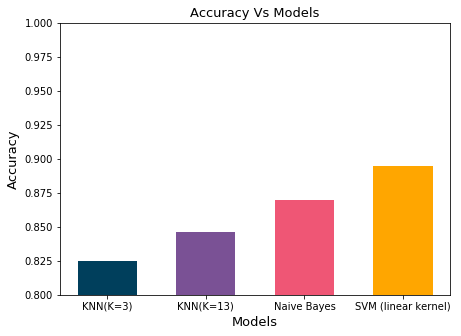

In [48]:
classifiers = model_testdata_accuracy_comparisons.keys()
x_position = np.arange(len(classifiers))
accuracy_values = model_testdata_accuracy_comparisons.values()
plt.figure(figsize=(7,5))
plt.bar(x_position, accuracy_values, align='center', width=0.6, color= ['#003f5c', '#7a5195', '#ef5675', '#ffa600'])
plt.xticks(x_position, classifiers)
plt.xlabel('Models', fontsize='13')
plt.ylabel('Accuracy', fontsize='13')
plt.ylim(0.8, 1)
plt.title('Accuracy Vs Models',fontsize='13')
plt.show()

<b>F1 Score Comparison </b>

In [49]:
pd.DataFrame(list(model_testdata_f1_comparisons.items()), columns=['Model Name', 'F1 Score on Test Data'])

,Model Name,F1 Score on Test Data
0,KNN(K=3),0.82
1,KNN(K=13),0.85
2,Naive Bayes,0.87
3,SVM (linear kernel),0.89


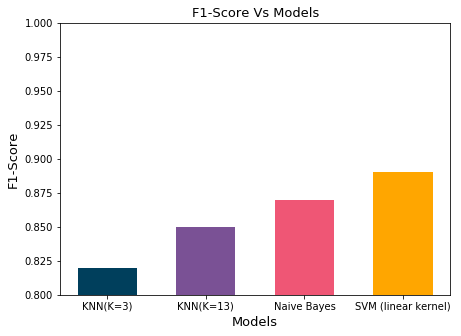

In [50]:
classifiers = model_testdata_f1_comparisons.keys()
x_position = np.arange(len(classifiers))
plt.figure(figsize=(7,5))
plt.bar(x_position, [float(x) for x in model_testdata_f1_comparisons.values()], align='center', width=0.6, color= ['#003f5c', '#7a5195', '#ef5675', '#ffa600'])
plt.xticks(x_position, classifiers)
plt.xlabel('Models', fontsize='13')
plt.ylabel('F1-Score', fontsize='13')
plt.ylim(0.8, 1)
plt.title('F1-Score Vs Models',fontsize='13')
plt.show()

<b>Results of the classification models using 5-Fold Cross Validation</b>

In [51]:
pd.DataFrame(list(model_cross_validation_accuracy_comparisons.items()), columns=['Model Name', 'Mean Accuracy using Cross Va;idation'])

,Model Name,Mean Accuracy using Cross Va;idation
0,KNN(K=14),0.823767
1,Naive Bayes,0.874149
2,SVM (linear kernel),0.889497


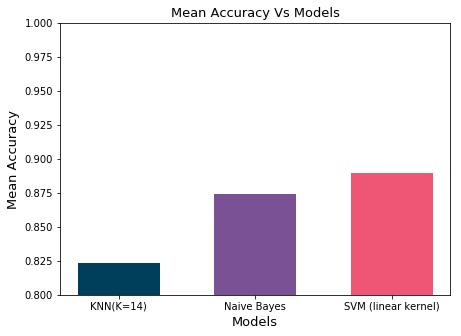

In [52]:
classifiers = model_cross_validation_accuracy_comparisons.keys()
x_position = np.arange(len(classifiers))
accuracy_values = model_cross_validation_accuracy_comparisons.values()
plt.figure(figsize=(7,5))
plt.bar(x_position, accuracy_values, align='center', width=0.6, color= ['#003f5c', '#7a5195', '#ef5675', '#ffa600'])
plt.xticks(x_position, classifiers)
plt.xlabel('Models', fontsize='13')
plt.ylabel('Mean Accuracy', fontsize='13')
plt.ylim(0.8, 1)
plt.title('Mean Accuracy Vs Models',fontsize='13')
plt.show()

<b>Observation</b>
1. Using Simple Hold Out Approach, if we use KNN with K=3 and cosine similarity metric, then we are getting 82.5% accuracy. After fine tuning the performance of KNN, we were able to get 84.6% Accuracy. We are only tuning the value of K, but we can tune other parameters also. <br/>
2. Naive Bayes incorrectly assumes that all terms are independent, but we can see that it is still very effective. We are getting better accuracy (86.9%) than KNN. <br/>
3. SVM is giving us the best accuracy of 89.5% on Hotels and Travels Dataset.  <br/>
4. If we look at F1 scores, we can see similar results. SVM giving us the best result with value 0.89. Followed by Naive Bayes (0.87) and then KKN(0.85)  <br/>
5. Also, using Cross Validation, we are seeing similar results. SVM with linear kernel is giving us highest mean accuracy of 88.9%, followed by Naive Bayes (87.4%) and then KNN. <br/>
6. One of the reason why we are getting high accuracy with SVM is that generally text analysis involves high dimensionality data. And there is some sort of relationship between them. Naive Bayes assumes that all the features are independent but SVM considers the dependency between the features also. That's why it takes more time to train as compared to Naive Bayes. 

## Category 2 - Bars

For this task, we just need two columns 'Review Text' and 'class_label' of bars dataset.

In [53]:
X_bars=bars_dataset['Review Text']
Y_bars=bars_dataset['class_label']

First we need to split the data in training and test dataset. Training dataset is used to train the model and create the document-term matrix. We are also using it to perform parameter tuning of the model. Once we have our model ready, we are predicting the values on the test dataset to find the accuracy and to create a confusion matrix. We are splitting the data into 70% training set and 30% test set

In [54]:
train_documents, test_documents, train_target, test_target = train_test_split(X_bars, Y_bars, random_state=0,\
                                                                              train_size = 0.7,test_size=0.3)

Using TfidfVectorizer function of sklearn we will create a document-term matrix on train_document. Inside this function we have specified the pre-processing steps it should consider. We have set min_df=3 and have passed a custom tokenizer to handle lemmatisation and stop words removal. It converts text to lowercase and excludes terms of length <2. We have used the same approach that we have followed in above part.

In [55]:
vectorizer = TfidfVectorizer(min_df = 3,tokenizer=lemma_tokenizer,ngram_range=(1, 2))
train_data_bars = vectorizer.fit_transform(train_documents)
print(train_data_bars.shape)

(1021, 4331)


Now we have our document-term matrix ready. We have created a numeric representation of the data that is suitable for classification. It will be used to train our model. And also our test documents will use the same vocabulary which is created above

In [56]:
test_data_bars = vectorizer.transform(test_documents)
print(test_data_bars.shape)

(438, 4331)


We have created document-term matrix from test documents by calling transform() method to use the same vocabulary as the of training dataset. We will use text_X in the below models for testing purpose. It will be used when we are testing for Simple Hold Out Approach.

For <b>cross-validation</b> we need document term matrix on entire dataset. In that approach we are not dividing our dataset in training and testing. Following steps are performed for K-Fold Cross Validation :- 

1. We first divide our data into k disjoint subsets known as “folds”<br/>
2. Then for each of k experiments, we use k-1 folds for training and the
selected one fold for testing <br/>
3. We repeat this process for all k folds and at the end we find the average accuracy rates.

In [57]:
vectorizer_dataset_Health_Medical = TfidfVectorizer(min_df = 3,tokenizer=lemma_tokenizer)
bars_dataset_X = vectorizer.fit_transform(X_bars)
print(bars_dataset_X.shape)

(1460, 6121)


### Build a classification model using a classifier of your choice, to distinguish between “positive” and “negative” reviews.

In [58]:
category2_model_testdata_accuracy_comparisons = dict()
category2_model_testdata_f1_comparisons = dict()
category2_model_cross_validation_accuracy_comparisons = dict()

I have used k-nearest neighbors to perform the classification. In this we look at the k nearest neighbour to find out the label for new instance. First I have created the mdoel where value of K=3 and using simple hold out approach to perform the evaluation

In [59]:
model = KNeighborsClassifier(n_neighbors=3,metric='cosine')
# build a model on the document-term matrix created from the training dataset
model.fit(train_data_bars,train_target)
print(model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')


Now, we are making predictions on the test dataset and comparing it's value with the actual result to find the accuracy score. We are also creating a confusion matrix, which summarises different aspects of classifier performance

In [60]:
# Make a set of predictions for the test data
y_pred = model.predict(test_data_bars)

# Print performance details
accuracy = metrics.accuracy_score(test_target, y_pred) # , normalize=True, sample_weight=None
category2_model_testdata_accuracy_comparisons["KNN(K=3)"] = accuracy
print("Classification accuracy = %.2f" % accuracy)
print(metrics.classification_report(test_target, y_pred))

report = metrics.classification_report(test_target, y_pred)
category2_model_testdata_f1_comparisons["KNN(K=3)"] = report.split('\n')[-2].split('      ')[3]
# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(test_target, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Classification accuracy = 0.75
              precision    recall  f1-score   support

    Negative       0.62      0.66      0.64       146
     Postive       0.82      0.80      0.81       292

   micro avg       0.75      0.75      0.75       438
   macro avg       0.72      0.73      0.72       438
weighted avg       0.76      0.75      0.75       438

Confusion Matrix


Predicted,Negative,Postive,All
True,,,
Negative,96,50,146
Postive,59,233,292
All,155,283,438


We are getting 75% accuracy by performing simple hold out approach. In this model we have set value of k=3. But we can perform some parameter tuning to improve the performance

<b>Hyper Parameters Tuning of KNN model using Grid Search </b>

First we define the parameter values that should be tuned. In our case we want to find the best value of k in the range of 1 to 20. We create a parameter grid which maps the parameter names to the values that should be searched. It is a dictionary where key is the parameter name and value is the list of values that should be searched for that parameter. Then we instatiate the Grid by specifying the model, parameter grid, number of fold to perform cross validation and what scoring should be use to find the best parameter. We are using training dataset to perform the hyper parameter tuning of our model

In [61]:
k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}


In [62]:
# instantiate the grid
grid = GridSearchCV(KNeighborsClassifier(metric='cosine'), param_grid, cv=5, scoring='accuracy')
grid.fit(train_data_bars, train_target)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [63]:
# Print details
print("Best parameters set found on training set:")
display(grid.best_params_)
display(grid.best_score_)

Best parameters set found on training set:


{'n_neighbors': 14}

0.8109696376101861

We can see from the above results that when k=14, we get the best accuracy

### Using the best parameters to make predictions on the test dataset

In [64]:
knn = KNeighborsClassifier(n_neighbors=14, metric='cosine')
knn.fit(train_data_bars, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
           metric_params=None, n_jobs=None, n_neighbors=14, p=2,
           weights='uniform')

Now, we are making predictions on the test dataset and comparing it's value with the actual result to find the accuracy score. We are also creating a confusion matrix, which summarises different aspects of classifier performance. 

In [65]:
# Make a set of predictions for the test data
y_pred = knn.predict(test_data_bars)

# Print performance details
accuracy = metrics.accuracy_score(test_target, y_pred) # , normalize=True, sample_weight=None
category2_model_testdata_accuracy_comparisons["KNN(K=14)"] = accuracy
print("Classification accuracy = %.2f" % accuracy)
print(metrics.classification_report(test_target, y_pred))

report = metrics.classification_report(test_target, y_pred)
category2_model_testdata_f1_comparisons["KNN(K=14)"] = report.split('\n')[-2].split('      ')[3]
# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(test_target, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Classification accuracy = 0.81
              precision    recall  f1-score   support

    Negative       0.72      0.71      0.71       146
     Postive       0.85      0.86      0.86       292

   micro avg       0.81      0.81      0.81       438
   macro avg       0.79      0.78      0.79       438
weighted avg       0.81      0.81      0.81       438

Confusion Matrix


Predicted,Negative,Postive,All
True,,,
Negative,103,43,146
Postive,40,252,292
All,143,295,438


We are getting <b>81% accuracy </b>with <b>KNN classifier </b> when using Hold-out strategy

We can also use <b>Cross-Validation</b> to measure the performance of the classifier. In this we are using the tuned KNN model to perform the evaluation.

In [66]:
tuned_knn = KNeighborsClassifier(n_neighbors=14, metric='cosine')

In [67]:
scores = cross_val_score(tuned_knn, bars_dataset_X,Y_bars, cv=5, scoring="accuracy")
print(scores)

[0.82191781 0.78082192 0.73287671 0.80479452 0.78424658]


In [68]:
category2_model_cross_validation_accuracy_comparisons["KNN(K=10)"] = scores.mean()
scores.mean()

0.7849315068493151

We are getting <b>78.4% </b>accuracy with KNN Classifier when we are using Cross-Validation

### Other classifiers that can be used to classify reviews as Positive and Negative

### 2. Naive Bayes Classifier- 
In this the classification is based on term frequency counts. It incorrectly assumes all terms are independent, but can still be effective in practice. 

First we created a naive bayes model and train it with the help of training dataset. We are then using document-term matrix which we have created above to train the model. Then we are using test documents to make predictions. Again we are using document-term matrix for test documents which was created above.

In [69]:
nb_model = MultinomialNB()
nb_model.fit(train_data_bars, train_target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Making prediction and finding the accuracy score and confusion matrix

In [70]:
y_pred = nb_model.predict(test_data_bars)
# Print performance details
accuracy = metrics.accuracy_score(test_target, y_pred) # , normalize=True, sample_weight=None
category2_model_testdata_accuracy_comparisons["Naive Bayes"] = accuracy
print("Classification accuracy = %.2f" % accuracy)
print(metrics.classification_report(test_target, y_pred))

report = metrics.classification_report(test_target, y_pred)
category2_model_testdata_f1_comparisons["Naive Bayes"] = report.split('\n')[-2].split('      ')[3]
# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(test_target, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Classification accuracy = 0.84
              precision    recall  f1-score   support

    Negative       0.88      0.61      0.72       146
     Postive       0.83      0.96      0.89       292

   micro avg       0.84      0.84      0.84       438
   macro avg       0.86      0.78      0.81       438
weighted avg       0.85      0.84      0.83       438

Confusion Matrix


Predicted,Negative,Postive,All
True,,,
Negative,89,57,146
Postive,12,280,292
All,101,337,438


We are getting <b>84% accuracy </b>with <b>Naive Bayes Classifier </b> when using Hold-out strategy

We can also use <b>Cross-Validation</b> to measure the performance of the classifier.

In [71]:
nb_model_cross_validation = MultinomialNB()

In [72]:
scores = cross_val_score(nb_model_cross_validation, bars_dataset_X,Y_bars, cv=5, scoring="accuracy")
print(scores)

[0.85616438 0.80136986 0.81164384 0.83561644 0.79794521]


In [73]:
category2_model_cross_validation_accuracy_comparisons["Naive Bayes"] = scores.mean()
scores.mean()

0.8205479452054796

We are getting <b>82.0% </b>accuracy with Naive Bayes Classifier when we are using Cross-Validation

### 3. SVMs with a linear kernel to calculate document similarity

First we create a svm model and train it with the help of training dataset. We are using document-term matrix which was created above to train the model. Then we are using test documents for predictions. Again we are using document-term matrix for test documents which was created above

In [74]:
svc_model = SVC(kernel='linear')
svc_model.fit(train_data_bars, train_target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Making prediction and finding the accuracy score and confusion matrix

In [75]:
y_pred = svc_model.predict(test_data_bars)
# Print performance details
accuracy = metrics.accuracy_score(test_target, y_pred) # , normalize=True, sample_weight=None
category2_model_testdata_accuracy_comparisons["SVM (linear kernel)"] = accuracy
print("Classification accuracy = %.2f" % accuracy)
print(metrics.classification_report(test_target, y_pred))

report = metrics.classification_report(test_target, y_pred)
category2_model_testdata_f1_comparisons["SVM (linear kernel)"] = report.split('\n')[-2].split('      ')[3]
# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(test_target, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Classification accuracy = 0.86
              precision    recall  f1-score   support

    Negative       0.80      0.76      0.78       146
     Postive       0.88      0.90      0.89       292

   micro avg       0.86      0.86      0.86       438
   macro avg       0.84      0.83      0.84       438
weighted avg       0.85      0.86      0.86       438

Confusion Matrix


Predicted,Negative,Postive,All
True,,,
Negative,111,35,146
Postive,28,264,292
All,139,299,438


We are getting <b>86% accuracy</b> with <b>SVM Classifier </b> when using Hold-out strategy

We can also use <b>Cross-Validation</b> to measure the performance of the classifier.

In [76]:
svc_model_cross_validation = SVC(kernel='linear')

In [77]:
scores = cross_val_score(svc_model_cross_validation, bars_dataset_X,Y_bars, cv=5, scoring="accuracy")
print(scores)

[0.89383562 0.80821918 0.85616438 0.84246575 0.87328767]


In [78]:
category2_model_cross_validation_accuracy_comparisons["SVM (linear kernel)"] = scores.mean()
scores.mean()

0.8547945205479452

We are getting <b>85.4% </b>accuracy with SVM Classifier when we are using Cross-Validation

## Result Evaluation 
<a id="task_2_2"></a>

I have build three classification model to distinguish between “positive” and “negative” reviews <br/>
1) K-Nearest Neighbour (KNN) <br/>
2) Naive Bayes <br/>
3) Support Vector Machine (SVM) <br/>

For evaluation purpose, I have used two two strategies </br>

1) <b>Hold Out Approach </b>- In this we split the data into training and testing dataset. We have used 70-30 split, which means 70% will be used to train the model and 30% will be used to test the model. One of the disadvantage of this approach is that evaluation score is dependent on how the data is splitted into train and test dataset  <br/> 

2) <b>5-Fold Cross Validation </b>- In this we split the dataset into 5 folds. We perform five experiments in which one selected fold is used to test the dataset and remaining 4 fold is used to train the model. We repeat this process for all the five experiments. Cross-validation will give our models the opportunity to train on multiple train-test splits. This will give us a better indication of how well our model will perform on unseen data.

<b>Results of the classification models using Hold Out Approach</b>

<b>Model Accuracy Comparison</b>

In [79]:
pd.DataFrame(list(category2_model_testdata_accuracy_comparisons.items()), columns=['Model Name', 'Accuracy on Test Data'])

,Model Name,Accuracy on Test Data
0,KNN(K=3),0.751142
1,KNN(K=14),0.810502
2,Naive Bayes,0.842466
3,SVM (linear kernel),0.856164


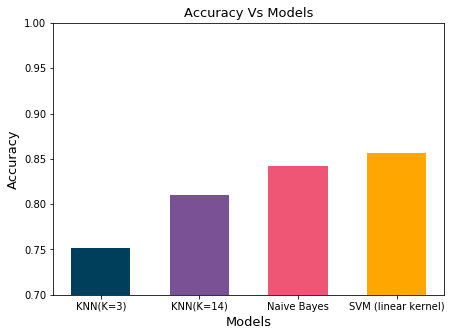

In [80]:
classifiers = category2_model_testdata_accuracy_comparisons.keys()
x_position = np.arange(len(classifiers))
accuracy_values = category2_model_testdata_accuracy_comparisons.values()
plt.figure(figsize=(7,5))
plt.bar(x_position, accuracy_values, align='center', width=0.6, color= ['#003f5c', '#7a5195', '#ef5675', '#ffa600'])
plt.xticks(x_position, classifiers)
plt.xlabel('Models', fontsize='13')
plt.ylabel('Accuracy', fontsize='13')
plt.ylim(0.7, 1)
plt.title('Accuracy Vs Models',fontsize='13')
plt.show()

<b>F1 Score Comparison </b>

In [81]:
pd.DataFrame(list(category2_model_testdata_f1_comparisons.items()), columns=['Model Name', 'F1 Score on Test Data'])

,Model Name,F1 Score on Test Data
0,KNN(K=3),0.75
1,KNN(K=14),0.81
2,Naive Bayes,0.83
3,SVM (linear kernel),0.86


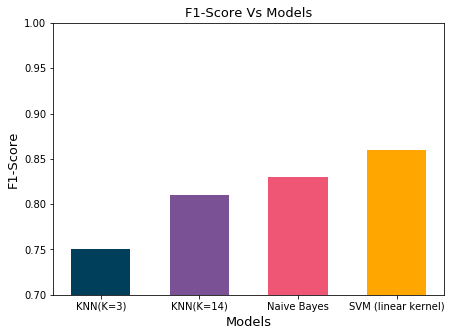

In [82]:
classifiers = category2_model_testdata_f1_comparisons.keys()
x_position = np.arange(len(classifiers))
plt.figure(figsize=(7,5))
plt.bar(x_position, [float(x) for x in category2_model_testdata_f1_comparisons.values()], align='center', width=0.6, color= ['#003f5c', '#7a5195', '#ef5675', '#ffa600'])
plt.xticks(x_position, classifiers)
plt.xlabel('Models', fontsize='13')
plt.ylabel('F1-Score', fontsize='13')
plt.ylim(0.7, 1)
plt.title('F1-Score Vs Models',fontsize='13')
plt.show()

<b>Results of the classification models using 5-Fold Cross Validation</b>

In [83]:
pd.DataFrame(list(category2_model_cross_validation_accuracy_comparisons.items()), columns=['Model Name', 'Mean Accuracy using Cross Va;idation'])

,Model Name,Mean Accuracy using Cross Va;idation
0,KNN(K=10),0.784932
1,Naive Bayes,0.820548
2,SVM (linear kernel),0.854795


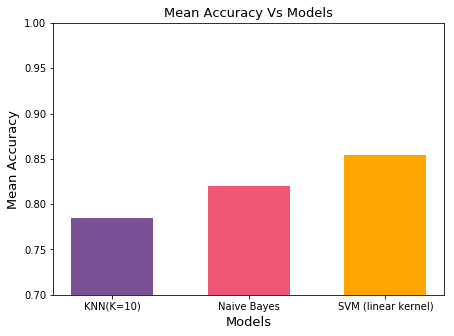

In [84]:
classifiers = category2_model_cross_validation_accuracy_comparisons.keys()
x_position = np.arange(len(classifiers))
accuracy_values = category2_model_cross_validation_accuracy_comparisons.values()
plt.figure(figsize=(7,5))
plt.bar(x_position, accuracy_values, align='center', width=0.6, color= ['#7a5195', '#ef5675', '#ffa600'])
plt.xticks(x_position, classifiers)
plt.xlabel('Models', fontsize='13')
plt.ylabel('Mean Accuracy', fontsize='13')
plt.ylim(0.7, 1)
plt.title('Mean Accuracy Vs Models',fontsize='13')
plt.show()

<b>Observation</b>
1. Using Simple Hold Out Approach, if we use KNN with K=3 and cosine similarity metric, then we are getting 75.1% accuracy. After fine tuning the performance of KNN, we were able to get 81.0% Accuracy. We are only tuning the value of K, but we can tune other parameters also. <br/>
2. Naive Bayes incorrectly assumes that all terms are independent, but we can see that it is still very effective. We are getting better accuracy (84.2%) than KNN. <br/>
3. SVM is giving us the best accuracy of 85.6% on Bars Dataset.  <br/>
4. If we look at F1 scores, we can see similar results. SVM giving us the best result with value 0.86. Followed by Naive Bayes (0.83) and then KKN(0.81)  <br/>
5. Also, using Cross Validation, we are seeing similar results. SVM with linear kernel is giving us highest mean accuracy of 85.4%, followed by Naive Bayes (82.0%) and then KNN (85.4%). <br/> 

## Task 3

Evaluate how well your two classification models transfer between category.
That is, run experiments to: <br/>
a. Train a classification model on the data from “Category A”, and evaluate its
performance on the data from “Category B”.<br/>
b. Train a classification model on the data from “Category B”, and evaluate its
performance on the data from “Category A”. 

## Part 1
Train a classification model on the data from “Category A”, and evaluate its performance on the data from “Category B”.<br/>
In our case Category 1 is bars and Category 2 is Hotels and Travel

In [85]:
#Category A
train_documents=bars_dataset['Review Text']
train_target=bars_dataset['class_label']

We are splitting the data in training and testing. Testing data would be used to evalaute the model trained on same category. 

In [86]:
train_documents_category_A, test_documents_category_A, train_target_category_A, test_target_category_A \
= train_test_split(train_documents, train_target, random_state=0,train_size = 0.7,test_size=0.3)

We would be using this data to evalaute the model trained on different category

In [87]:
#Category B (Test Dataset for Category B)
test_documents_category_B=hotels_travel_dataset['Review Text']
test_target_category_B=hotels_travel_dataset['class_label']

In [88]:
#vectorizer = CountVectorizer(stop_words="english",min_df = 3,tokenizer=lemma_tokenizer)
vectorizer = TfidfVectorizer(min_df = 3,tokenizer=lemma_tokenizer,ngram_range=(1, 2))
train_X = vectorizer.fit_transform(train_documents_category_A)
print(train_X.shape)

(1021, 4331)


Vector for test documents of same category

In [89]:
test_X_category_A = vectorizer.transform(test_documents_category_A)
print(test_X_category_A.shape)

(438, 4331)


Vector for test documents from different category

In [90]:
test_X_category_B = vectorizer.transform(test_documents_category_B)
print(test_X_category_B.shape)

(1430, 4331)


In the previous part, we saw that <b>SVM model</b> was giving us the best accuracy. So we will use that model to evaluate the performance.

In [91]:
svc_model = SVC(kernel='linear')
svc_model.fit(train_X, train_target_category_A)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Now, we are making predictions on the same category test dataset and comparing it's value with the actual result to find the accuracy score. We are also creating a confusion matrix, which summarises different aspects of classifier performance

In [92]:
y_pred = svc_model.predict(test_X_category_A)
# Print performance details
accuracy = metrics.accuracy_score(test_target_category_A, y_pred) # , normalize=True, sample_weight=None
print("Classification accuracy = %.2f" % accuracy)
print(metrics.classification_report(test_target_category_A, y_pred))
# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(test_target_category_A, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Classification accuracy = 0.86
              precision    recall  f1-score   support

    Negative       0.80      0.76      0.78       146
     Postive       0.88      0.90      0.89       292

   micro avg       0.86      0.86      0.86       438
   macro avg       0.84      0.83      0.84       438
weighted avg       0.85      0.86      0.86       438

Confusion Matrix


Predicted,Negative,Postive,All
True,,,
Negative,111,35,146
Postive,28,264,292
All,139,299,438


Now, we are making predictions on the different category test dataset and comparing it's value with the actual result to find the accuracy score. We are also creating a confusion matrix, which summarises different aspects of classifier performance

In [93]:
y_pred = svc_model.predict(test_X_category_B)
# Print performance details
accuracy = metrics.accuracy_score(test_target_category_B, y_pred) # , normalize=True, sample_weight=None
print("Classification accuracy = %.2f" % accuracy)
print(metrics.classification_report(test_target_category_B, y_pred))
# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(test_target_category_B, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Classification accuracy = 0.82
              precision    recall  f1-score   support

    Negative       0.85      0.74      0.79       637
     Postive       0.81      0.90      0.85       793

   micro avg       0.82      0.82      0.82      1430
   macro avg       0.83      0.82      0.82      1430
weighted avg       0.83      0.82      0.82      1430

Confusion Matrix


Predicted,Negative,Postive,All
True,,,
Negative,469,168,637
Postive,83,710,793
All,552,878,1430


<b>Hyper Parameters Tuning of SVM model using Grid Search </b>

We can try to tune the model using Grid Search. In SVM model, kernel, gammas and C value plays an important role.
C controls the trade off between smooth decision boundary and classifying the training points correctly. Gamma is a parameter for non linear hyperplanes. Higher value of gamma tries to exactly fit the training data set. Kernel parameters is used to select the type of hyperplane which will be used to separate the data. 

In [94]:
kernels = ['linear', 'rbf', 'poly']
gammas = [0.1, 1, 10, 100]
cs = [0.1, 1, 10, 100, 1000]
param_grid = dict(kernel=kernels, C= cs, gamma=gammas)

In [95]:
# instantiate the grid
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(train_X, train_target_category_A)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [96]:
# Print details
print("Best parameters set found on training set:")
display(grid.best_params_)
display(grid.best_score_)

Best parameters set found on training set:


{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}

0.8609206660137121

### Using the best parameters to make predictions on the test datasets of same category and different category

In [97]:
svc_model_tuned = SVC(kernel='rbf',C=10,gamma= 1)
svc_model_tuned.fit(train_X, train_target_category_A)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Now, we are making predictions on the same category test dataset and comparing it's value with the actual result to find the accuracy score. We are also creating a confusion matrix, which summarises different aspects of classifier performance

In [98]:
y_pred = svc_model_tuned.predict(test_X_category_A)
# Print performance details
accuracy = metrics.accuracy_score(test_target_category_A, y_pred) # , normalize=True, sample_weight=None
print("Classification accuracy = %.2f" % accuracy)
print(metrics.classification_report(test_target_category_A, y_pred))
# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(test_target_category_A, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Classification accuracy = 0.87
              precision    recall  f1-score   support

    Negative       0.84      0.76      0.80       146
     Postive       0.89      0.93      0.91       292

   micro avg       0.87      0.87      0.87       438
   macro avg       0.86      0.84      0.85       438
weighted avg       0.87      0.87      0.87       438

Confusion Matrix


Predicted,Negative,Postive,All
True,,,
Negative,111,35,146
Postive,21,271,292
All,132,306,438


Now, we are making predictions on the different category test dataset and comparing it's value with the actual result to find the accuracy score. We are also creating a confusion matrix, which summarises different aspects of classifier performance

In [99]:
y_pred = svc_model_tuned.predict(test_X_category_B)
# Print performance details
accuracy = metrics.accuracy_score(test_target_category_B, y_pred) # , normalize=True, sample_weight=None
print("Classification accuracy = %.2f" % accuracy)
print(metrics.classification_report(test_target_category_B, y_pred))
# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(test_target_category_B, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Classification accuracy = 0.83
              precision    recall  f1-score   support

    Negative       0.87      0.72      0.79       637
     Postive       0.80      0.91      0.85       793

   micro avg       0.83      0.83      0.83      1430
   macro avg       0.84      0.82      0.82      1430
weighted avg       0.83      0.83      0.82      1430

Confusion Matrix


Predicted,Negative,Postive,All
True,,,
Negative,456,181,637
Postive,68,725,793
All,524,906,1430


## Result Evaluation 
<a id="task_3_1"></a>

1) In Part 1 of task 3 we have to train a classification model on the data from “Category A”, and evaluate its performance on the test data from "Category A" and “Category B”. In our case Category 1 is bars and Category 2 is Hotels and Travel <br/>

2) In previous part, we saw that for Bars dataset, SVM was giving us best accuracy and F1 Score on the test dataset and also by evaluating it using cross-validation. So in this part, we have used SVM to train our model on bars training dataset and then we have predicted the value of test data of bars and also Hotels and Travel Dataset. <br/>

3) <b>As a result we can see that a model trained on bar reviews has 86% accuracy when tested on Bar review and 82% accuracy when tested on hotels and travel review.</b>
 
4) Also after fine tuning SVM model we were able to get 87% Accuracy on bar review test dataset and 83% accuracy on hotels and travel test dataset. Best parameters after fine tuning SVM were {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}. </br>

5) We can see that there is only slight(4%) difference in the accuracy when model was tested on same category test data and when tested on different category test data. This shows that document-term matrix which was created for bars dataset can be used to evaluate "Hotels and Travel" dataset very efficiently. The knowledge transfer from bar dataset to hotels and travel is very efficient. We can use the trained model to predict data from both the categories with good accuracy.   

## Part 2

Train a classification model on the data from “Category B”, and evaluate its performance on the data from “Category A” <br/>
In our Case, Category A is now "Hotels and Travel" and Category B is "Bar"

In [100]:
#Category A
train_documents=hotels_travel_dataset['Review Text']
train_target=hotels_travel_dataset['class_label']

We are splitting the data in training and testing. Testing data would be used to evalaute the model trained on same category. 


In [101]:
train_documents_category_A, test_documents_category_A, train_target_category_A, test_target_category_A \
= train_test_split(train_documents, train_target, random_state=0,train_size = 0.7,test_size=0.3)

We would be using this data to evalaute the model trained on different category

In [102]:
#Category B (Test Dataset)
test_documents_category_B=bars_dataset['Review Text']
test_target_category_B=bars_dataset['class_label']

We are them transforming the list of Review text into a document-term matrix by applying some pre-processing steps. We have used the same approach that we have followed in above part. Using a custom lemma_tokenizer to perform tokenization. In that function we have handled stopwords and also performed the lemmatization of tokens. We have converted everything to lower case and discarded words which appear in less than 3 documents

In [103]:
#vectorizer = CountVectorizer(stop_words="english",min_df = 3,tokenizer=lemma_tokenizer)
vectorizer = TfidfVectorizer(min_df = 3,tokenizer=lemma_tokenizer,ngram_range=(1, 2))
train_X = vectorizer.fit_transform(train_documents_category_A)
print(train_X.shape)

(1000, 5100)


We are creating document-term matrix from test documents by calling transform() method to use the same vocabulary as the of training dataset. We will use text_X in the below model for testing purpose.

Vector for test documents of same category

In [104]:
test_X_category_A = vectorizer.transform(test_documents_category_A)
print(test_X_category_A.shape)

(429, 5100)


Vector for test documents from different category

In [105]:
test_X_category_B = vectorizer.transform(test_documents_category_B)
print(test_X_category_B.shape)

(1460, 5100)


In the previous part, we saw that <b>SVM model</b> was giving us the best accuracy. So we will use that model to evaluate the performance.

In [106]:
svc_model = SVC(kernel='linear')
svc_model.fit(train_X, train_target_category_A)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Now, we are making predictions on the same category test dataset and comparing it's value with the actual result to find the accuracy score. We are also creating a confusion matrix, which summarises different aspects of classifier performance

In [107]:
y_pred = svc_model.predict(test_X_category_A)
# Print performance details
accuracy = metrics.accuracy_score(test_target_category_A, y_pred) # , normalize=True, sample_weight=None
print("Classification accuracy = %.2f" % accuracy)
print(metrics.classification_report(test_target_category_A, y_pred))
# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(test_target_category_A, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Classification accuracy = 0.90
              precision    recall  f1-score   support

    Negative       0.91      0.85      0.88       194
     Postive       0.88      0.93      0.91       235

   micro avg       0.90      0.90      0.90       429
   macro avg       0.90      0.89      0.89       429
weighted avg       0.90      0.90      0.89       429

Confusion Matrix


Predicted,Negative,Postive,All
True,,,
Negative,165,29,194
Postive,16,219,235
All,181,248,429


Now, we are making predictions on the different category test dataset and comparing it's value with the actual result to find the accuracy score. We are also creating a confusion matrix, which summarises different aspects of classifier performance

In [108]:
y_pred = svc_model.predict(test_X_category_B)
# Print performance details
accuracy = metrics.accuracy_score(test_target_category_B, y_pred) # , normalize=True, sample_weight=None
print("Classification accuracy = %.2f" % accuracy)
print(metrics.classification_report(test_target_category_B, y_pred))
# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(test_target_category_B, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Classification accuracy = 0.85
              precision    recall  f1-score   support

    Negative       0.88      0.70      0.78       565
     Postive       0.83      0.94      0.88       895

   micro avg       0.85      0.85      0.85      1460
   macro avg       0.85      0.82      0.83      1460
weighted avg       0.85      0.85      0.84      1460

Confusion Matrix


Predicted,Negative,Postive,All
True,,,
Negative,394,171,565
Postive,55,840,895
All,449,1011,1460


<b>Hyper Parameters Tuning of SVM model using Grid Search </b><br/>
We can try to tune the model using Grid Search. In SVM model, kernel, gammas and C value plays an important role. C controls the trade off between smooth decision boundary and classifying the training points correctly. Gamma is a parameter for non linear hyperplanes. Higher value of gamma tries to exactly fit the training data set. Kernel parameters is used to select the type of hyperplane which will be used to separate the data.

In [109]:
gammas = [0.1, 1, 10, 100]
cs = [0.1, 1, 10, 100, 1000]
param_grid = dict( C= cs, gamma=gammas)

In [110]:
# instantiate the grid
grid = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, scoring='accuracy')
grid.fit(train_X, train_target_category_A)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [111]:
# Print details
print("Best parameters set found on training set:")
display(grid.best_params_)
display(grid.best_score_)

Best parameters set found on training set:


{'C': 1, 'gamma': 0.1}

0.88

### Using the best parameters to make predictions on the test dataset

In [112]:
svc_model_tuned = SVC(kernel='linear',C=1,gamma= 1)
svc_model_tuned.fit(train_X, train_target_category_A)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Now, we are making predictions on the same category test dataset and comparing it's value with the actual result to find the accuracy score. We are also creating a confusion matrix, which summarises different aspects of classifier performance

In [113]:
y_pred = svc_model_tuned.predict(test_X_category_A)
# Print performance details
accuracy = metrics.accuracy_score(test_target_category_A, y_pred) # , normalize=True, sample_weight=None
print("Classification accuracy = %.2f" % accuracy)
print(metrics.classification_report(test_target_category_A, y_pred))
# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(test_target_category_A, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Classification accuracy = 0.90
              precision    recall  f1-score   support

    Negative       0.91      0.85      0.88       194
     Postive       0.88      0.93      0.91       235

   micro avg       0.90      0.90      0.90       429
   macro avg       0.90      0.89      0.89       429
weighted avg       0.90      0.90      0.89       429

Confusion Matrix


Predicted,Negative,Postive,All
True,,,
Negative,165,29,194
Postive,16,219,235
All,181,248,429


Now, we are making predictions on the different category test dataset and comparing it's value with the actual result to find the accuracy score. We are also creating a confusion matrix, which summarises different aspects of classifier performance

In [114]:
y_pred = svc_model_tuned.predict(test_X_category_B)
# Print performance details
accuracy = metrics.accuracy_score(test_target_category_B, y_pred) # , normalize=True, sample_weight=None
print("Classification accuracy = %.2f" % accuracy)
print(metrics.classification_report(test_target_category_B, y_pred))
# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(test_target_category_B, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Classification accuracy = 0.85
              precision    recall  f1-score   support

    Negative       0.88      0.70      0.78       565
     Postive       0.83      0.94      0.88       895

   micro avg       0.85      0.85      0.85      1460
   macro avg       0.85      0.82      0.83      1460
weighted avg       0.85      0.85      0.84      1460

Confusion Matrix


Predicted,Negative,Postive,All
True,,,
Negative,394,171,565
Postive,55,840,895
All,449,1011,1460


## Result Evaluation 
<a id="task_3_2"></a>

1) In Part 2 of task 3 we have to train a classification model on the data from “Category A”, and evaluate its performance on the test data from "Category A" and “Category B”. In our case Category 1 is Hotels and Travel and Category 2 is bars <br/>

2) In previous part, we saw that for Hotels and Travel dataset, SVM was giving us best accuracy and F1 Score on the test dataset and also by evaluating it using cross-validation. So in this part, we have used SVM to train our model on Hotels and Travel training dataset and then we have predicted the value of test data of Hotels and Travel and also Bars Dataset. <br/>

3) <b>As a result we can see that a model trained on Hotels and Travel reviews has 90% accuracy when tested on Hotels and Travel review and 85% accuracy when tested on bars review.</b>
 
4) Also after fine tuning SVM model we were able to get same accuracy. </br>

5) We can see that there is only slight(5%) difference in the accuracy when model was tested on same category test data and when tested on different category test data. This shows that document-term matrix which was created for Hotels and Travel dataset can be used to evaluate "Bars" dataset very efficiently. The knowledge transfer from Hotels and Travel dataset to bars is very efficient. We can use the trained model to predict data from both the categories with good accuracy. 

## Conclusion 

In this assignment, we have divided Task 2 in two parts. First part involves training and testing Category 1 data that is Hotels and Travel and in second part, we are training and testing Category 2 data that is Bars. I have included the result and analysis, after executing each part. <br/>
You can check the Analysis of Task 2 from below cells- <br/>
[Result of Hotels and Travel Dataset](#task_2_1)<br/>
[Result of Bars Dataset](#task_2_2)<br/>
You can check the Analysis of Task 3 from below cells- <br/>
[Part 1- Category 1 as training data and Category 2 as test data](#task_3_1)<br/>
[Part 2- Category 2 as training data and Category 1 as test data](#task_3_2)<br/>



1. From the results, we can see that SVM has given us the best accuracy and F1-Score as compared to Naive Bayes and K-nearest neighbors algorithm.<br/>
2. One of the reason can be that SVM works well with <b>high dimensional data</b> like we have in our text analysis case. Also the risk of <b>over-fitting is less</b> in SVM models, making it more robust. <br/>
3. One of the disadvantage is that training and fine tuning a SVM model takes more time as compared to other two models. <br/>
4. On the other hand we can see that Naive Bayes is also giving us good result despite the fact that it treats each feature independently. It is easy to train and implement a naive bayes model. And also fine tuning is much easier and less computationally expensive than SVM model.<br/>
5. If we look at the result of task 3, we can see that a model trained on Hotels and travel dataset, can predict the value of bars dataset with high accuracy. And similar is the result in other case, when we trained our model on Bars dataset and used hotels and travel dataset for evaluation. <br/>
6. A model trained on bar reviews has 86% accuracy when tested on Bar review and 82% accuracy when tested on hotels and travel review.<br/>
7. A model trained on Hotels and Travel reviews has 90% accuracy when tested on Hotels and Travel review and 85% accuracy when tested on bars review<br/>
8. This shows that both dataset have similar kind of words which makes a review positive or negative. Since hotels and travel category and bars category comes under same domain, there is high probability of similar kind of reviews. That's why we are getting high accuracy in both the cases.  